## Fully Connected VAE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
z_dim = 20
batch_size = 100
nb_steps = 50000

In [3]:
def render_images(np_x):
    np_x = np_x.reshape((10,10,28,28))
    np_x = np.concatenate(np.split(np_x,10,axis=0),axis=3)
    np_x = np.concatenate(np.split(np_x,10,axis=1),axis=2)
    x_img = np.squeeze(np_x)
    plt.imshow(x_img, cmap='Greys_r')
    plt.show()

In [4]:
def encoder(x, z_dim=20, reuse=False):
    with tf.variable_scope("encoder", reuse=reuse):
        l1 = tf.layers.dense(x, 512, activation=tf.nn.relu)
        l2 = tf.layers.dense(l1, 256, activation=tf.nn.relu)
        mu = tf.layers.dense(l2, z_dim, activation=None)
        sigma = 1e-6 + tf.nn.softplus(tf.layers.dense(l2, z_dim, activation=None))
        return mu, sigma

In [5]:
def decoder(z, z_dim=20, reuse=False):
    with tf.variable_scope("decoder", reuse=reuse):
        l1 = tf.layers.dense(z, 256, activation=tf.nn.relu)
        l2 = tf.layers.dense(l1, 512, activation=tf.nn.relu)
        x_hat = tf.layers.dense(l2, 784, activation=tf.nn.sigmoid)
        return x_hat

In [6]:
x = tf.placeholder(tf.float32, [batch_size, 784])
mu, sigma = encoder(x, z_dim=z_dim)
z = mu + sigma * tf.random_normal([z_dim], 0, 1, dtype=tf.float32)
x_hat = decoder(z)

In [7]:
loglikelihood = tf.reduce_mean(tf.reduce_sum(x * tf.log(x_hat + 1e-8) + (1 - x) * tf.log(1 - x_hat + 1e-8), [1]))
kl = tf.reduce_mean(0.5 * tf.reduce_sum(tf.square(mu) + tf.square(sigma) - tf.log(1e-8 + tf.square(sigma)) - 1, [1]))
ELBO = loglikelihood - kl
loss = -ELBO

In [8]:
optim_op = tf.train.AdamOptimizer(1e-3).minimize(loss)
init_op = tf.global_variables_initializer()

In [9]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True, reshape=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Step: 1000 in 4.84s :: Loss: 137.605 => Recons.: 121.099, KL: 16.506
Step: 2000 in 4.72s :: Loss: 131.181 => Recons.: 113.343, KL: 17.838
Step: 3000 in 4.74s :: Loss: 124.466 => Recons.: 106.260, KL: 18.205
Step: 4000 in 4.73s :: Loss: 124.528 => Recons.: 105.569, KL: 18.959
Step: 5000 in 4.75s :: Loss: 109.081 => Recons.: 89.960, KL: 19.121


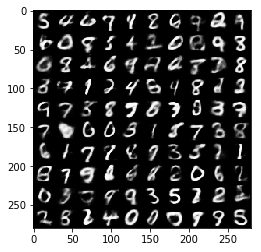

Step: 6000 in 4.70s :: Loss: 113.969 => Recons.: 92.908, KL: 21.061
Step: 7000 in 4.76s :: Loss: 106.335 => Recons.: 86.885, KL: 19.450
Step: 8000 in 4.75s :: Loss: 106.576 => Recons.: 86.661, KL: 19.915
Step: 9000 in 4.77s :: Loss: 109.337 => Recons.: 89.387, KL: 19.950
Step: 10000 in 4.79s :: Loss: 107.364 => Recons.: 85.962, KL: 21.403


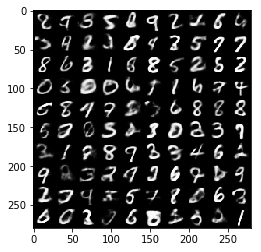

Step: 11000 in 4.73s :: Loss: 112.192 => Recons.: 91.951, KL: 20.241
Step: 12000 in 4.75s :: Loss: 101.852 => Recons.: 81.573, KL: 20.279
Step: 13000 in 4.70s :: Loss: 102.086 => Recons.: 80.498, KL: 21.588
Step: 14000 in 4.79s :: Loss: 105.062 => Recons.: 83.409, KL: 21.653
Step: 15000 in 4.77s :: Loss: 112.600 => Recons.: 92.810, KL: 19.790


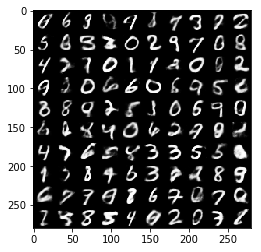

Step: 16000 in 4.83s :: Loss: 103.307 => Recons.: 82.421, KL: 20.887
Step: 17000 in 4.62s :: Loss: 104.307 => Recons.: 83.164, KL: 21.143
Step: 18000 in 4.77s :: Loss: 101.419 => Recons.: 81.385, KL: 20.034
Step: 19000 in 4.73s :: Loss: 104.102 => Recons.: 82.371, KL: 21.731
Step: 20000 in 4.75s :: Loss: 104.193 => Recons.: 85.050, KL: 19.143


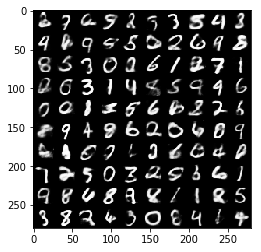

Step: 21000 in 4.84s :: Loss: 106.294 => Recons.: 87.123, KL: 19.171
Step: 22000 in 4.64s :: Loss: 109.687 => Recons.: 87.448, KL: 22.239
Step: 23000 in 4.76s :: Loss: 107.066 => Recons.: 86.275, KL: 20.791
Step: 24000 in 4.75s :: Loss: 97.340 => Recons.: 76.983, KL: 20.358
Step: 25000 in 4.75s :: Loss: 103.533 => Recons.: 81.799, KL: 21.734


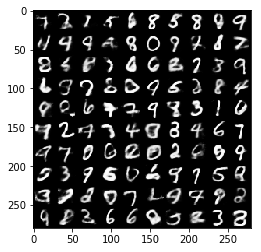

Step: 26000 in 4.60s :: Loss: 104.951 => Recons.: 82.600, KL: 22.351
Step: 27000 in 4.02s :: Loss: 99.943 => Recons.: 78.118, KL: 21.825
Step: 28000 in 3.92s :: Loss: 94.088 => Recons.: 73.693, KL: 20.395
Step: 29000 in 4.18s :: Loss: 101.978 => Recons.: 81.863, KL: 20.115
Step: 30000 in 4.82s :: Loss: 104.959 => Recons.: 84.480, KL: 20.480


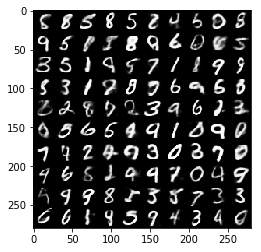

Step: 31000 in 4.90s :: Loss: 102.012 => Recons.: 80.694, KL: 21.318
Step: 32000 in 4.73s :: Loss: 95.146 => Recons.: 75.311, KL: 19.835
Step: 33000 in 4.67s :: Loss: 98.153 => Recons.: 78.054, KL: 20.100
Step: 34000 in 4.74s :: Loss: 103.253 => Recons.: 81.487, KL: 21.766
Step: 35000 in 4.77s :: Loss: 101.192 => Recons.: 79.839, KL: 21.353


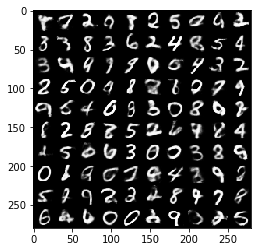

Step: 36000 in 4.90s :: Loss: 110.332 => Recons.: 88.375, KL: 21.957
Step: 37000 in 4.73s :: Loss: 96.413 => Recons.: 74.413, KL: 22.001
Step: 38000 in 4.77s :: Loss: 106.742 => Recons.: 85.093, KL: 21.649
Step: 39000 in 4.63s :: Loss: 101.202 => Recons.: 80.908, KL: 20.294
Step: 40000 in 4.72s :: Loss: 101.394 => Recons.: 79.476, KL: 21.918


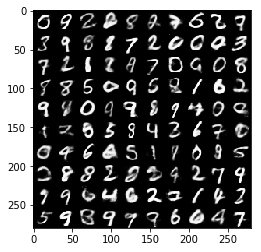

Step: 41000 in 4.88s :: Loss: 94.229 => Recons.: 73.398, KL: 20.830
Step: 42000 in 4.77s :: Loss: 94.258 => Recons.: 72.730, KL: 21.528
Step: 43000 in 4.70s :: Loss: 97.673 => Recons.: 77.427, KL: 20.245
Step: 44000 in 4.65s :: Loss: 93.940 => Recons.: 72.790, KL: 21.150
Step: 45000 in 4.76s :: Loss: 94.285 => Recons.: 73.065, KL: 21.220


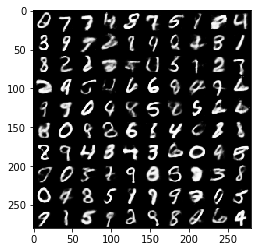

Step: 46000 in 4.88s :: Loss: 104.413 => Recons.: 83.975, KL: 20.438
Step: 47000 in 4.78s :: Loss: 97.825 => Recons.: 77.091, KL: 20.734
Step: 48000 in 4.72s :: Loss: 99.918 => Recons.: 78.003, KL: 21.915
Step: 49000 in 4.79s :: Loss: 92.109 => Recons.: 70.514, KL: 21.594
Step: 50000 in 4.68s :: Loss: 99.128 => Recons.: 77.427, KL: 21.701


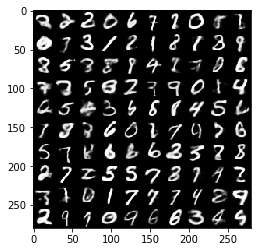

In [11]:
sess.run(init_op)
start_time = time.time()
for stp in range(1, nb_steps+1):
    x_np, _ = mnist.train.next_batch(batch_size)
    _, loss_np, rec_np, kl_np = sess.run([optim_op, loss, loglikelihood, kl], feed_dict={x: x_np})
    if stp % 1000 == 0:
        end_time = time.time()
        print('Step: {:d} in {:.2f}s :: Loss: {:.3f} => Recons.: {:.3f}, KL: {:.3f}'.format(stp, end_time - start_time, loss_np, -rec_np, kl_np))
        start_time = end_time
    if stp % 5000 == 0:
        z_np = np.random.randn(100, z_dim)
        x_hat_np = sess.run(x_hat, feed_dict={z: z_np})
        render_images(x_hat_np)